                t          x
count   21.000000  21.000000
mean    88.000000  17.942177
std     49.638695   3.982831
min      8.000000  10.000000
25%     48.000000  15.535714
50%     88.000000  18.571429
75%    128.000000  21.071429
max    168.000000  23.928571
R^2:  17.0 %
Fitted parameters are below :
       Xm=18.703214839725288 and Um=0.19860916811688498


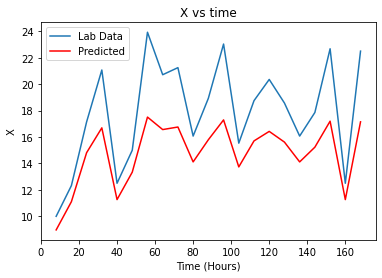

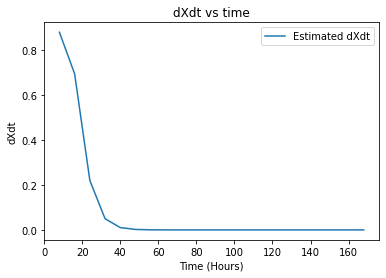

In [49]:
# x vs t
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import os
import C

path=os.getcwd()+"//"
data_x_vs_t=pd.read_excel(path+"data.xlsx",sheet_name="x_vs_t")
print(data_x_vs_t.describe())

# X vs t
def x_vs_t(X,Xm,Um):
    t=X
    return Xm/(1+((Xm/C.X0)-1)*np.exp(-Um*t))

# dxdt vs time
def dXdt_vs_time(X,Xm,Um):
    t=X
    X1=x_vs_t(X,Xm,Um)
    return Um*X1*(1-X1/Xm)

g=[184,.33]
t=data_x_vs_t["t"].values
X=data_x_vs_t["x"].values
g,cov=curve_fit(x_vs_t,t,X,g)
y =[x_vs_t(t,g[0],g[1]) for t in X]
Xm,Um=g[0],g[1]
print('R^2: ', 100*round(r2_score(X,y),2),"%")

print("Fitted parameters are below :")
print("       Xm={0} and Um={1}".format(g[0],g[1]))

plt.plot(t,X,label="Lab Data")
plt.plot(t,y,'r',label="Predicted")
plt.ylabel("X")
plt.xlabel("Time (Hours)")
plt.title("X vs time")
plt.legend()
plt.show()

plt.plot(t,dXdt_vs_time(t,g[0],g[1]),label='Estimated dXdt')
plt.ylabel("dXdt")
plt.xlabel("Time (Hours)")
plt.title("dXdt vs time")
plt.legend()
plt.show()

               t        co2
count   23.00000  23.000000
mean    66.00000   0.167411
std     40.69398   0.096106
min      0.00000   0.005357
25%     33.00000   0.066964
50%     66.00000   0.198214
75%     99.00000   0.251786
max    132.00000   0.294643
R^2:  86.01 %
Fitted parameters are below :
       Yxco2=5.585178482808419 and Mco2=0.005549897240485366


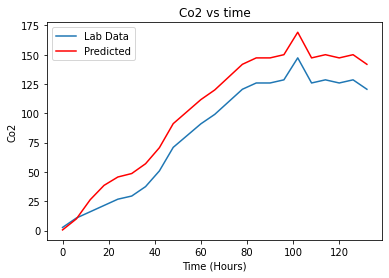

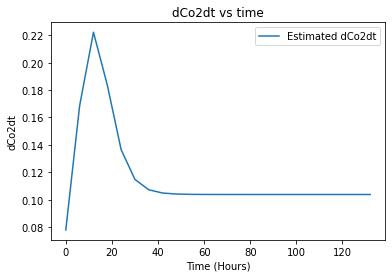

In [50]:
####### co2 vs t
path=os.getcwd()+"//"
data_co2_vs_t=pd.read_excel(path+"data.xlsx",sheet_name="co2_vs_t")
print(data_co2_vs_t.describe())

# CO2 vs t
def co2_vs_t(X,Yxco2,Mco2):
    Xm,Um=184,.33
    t=X
    comn=1+((Xm/C.X0)-1)*np.exp(-Um*t)
    RHS1=1/(Yxco2*comn)
    RHS2=1/(Yxco2*(Xm/C.X0))
    RHS3=(Mco2/Um)*np.log(comn/((Xm/C.X0)*np.exp(-Um*t)))
    return C.CCP0+Xm*(RHS1-RHS2+RHS3)

# dco2dt vs time
def dco2dt_vs_t(X,Yxco2,Mco2,Xm,Um):
    #Xm,Um=184,.33
    t=X
    comn=1+((Xm/C.X0)-1)*np.exp(-Um*t)
    RHS1=Um/Yxco2
    RHS2=RHS1*(1-1/(comn))
    RHS3=RHS2+Mco2
    return RHS3*Xm/comn

g=[2.60,.005]
t=data_co2_vs_t["t"].values
X=data_co2_vs_t["co2"].values
X=500*X #scaling
g,cov=curve_fit(co2_vs_t,t,X,g)
y =[co2_vs_t(t,g[0],g[1]) for t in X]
Yxco2,Mco2=g[0],g[1]

print('R^2: ', round(100*r2_score(y,X),2),"%")
print("Fitted parameters are below :")
print("       Yxco2={0} and Mco2={1}".format(g[0],g[1]))

plt.plot(t,X,label='Lab Data')
plt.plot(t,y,'r',label='Predicted')
plt.xlabel("Time (Hours)")
plt.ylabel("Co2")
plt.title("Co2 vs time")
plt.legend()
plt.show()

plt.plot(t,dco2dt_vs_t(t,Yxco2,Mco2,Xm,Um),label='Estimated dCo2dt')
plt.xlabel("Time (Hours)")
plt.ylabel("dCo2dt")
plt.title("dCo2dt vs time")
plt.legend()
plt.show()
